# Convolutional Neural Network (CNN) 

### Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### ====================================

# MNIST

### Loading & Inspecting Data

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train[0].shape

(28, 28)

In [4]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Exploring Data

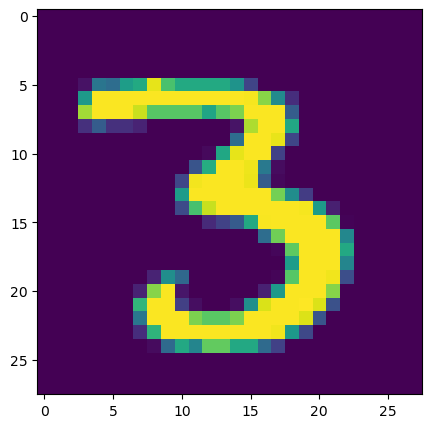

In [6]:
plt.figure(figsize=(10,5))
plt.imshow(X_train[12,:,:])
plt.show()

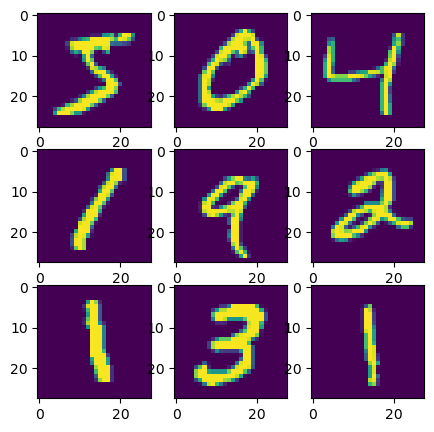

In [7]:
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i,:,:])

### Preparing Data

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_train = X_train.reshape((60000, 28, 28, 1)) # Reshaping
X_train = X_train.astype('float32') / 255 # Normalizing

In [10]:
X_train.shape

(60000, 28, 28, 1)

In [11]:
X_test.shape

(10000, 28, 28)

In [12]:
X_test = X_test.reshape((10000, 28, 28, 1))
X_test = X_test.astype('float32') / 255

In [13]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

##### ==============

# 1] Using Convolutional Neural Network (CNN)

### Model Building

In [14]:
from keras import layers
from keras import models

In [15]:
cnn = models.Sequential()

# Feature Extraction
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
cnn.add(layers.MaxPooling2D((2,2)))

cnn.add(layers.Conv2D(64, (3,3), activation='relu'))
cnn.add(layers.MaxPooling2D((2,2)))

cnn.add(layers.Conv2D(64, (3,3), activation='relu'))

# Fully-connected Layer
cnn.add(layers.Flatten())
cnn.add(layers.Dense(64, activation='relu'))
cnn.add(layers.Dense(10, activation='softmax'))

C:\Users\ELmohannd\Downloads\anacond2025\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### Model Training

In [18]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.8763 - loss: 0.3936
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9844 - loss: 0.0505
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9900 - loss: 0.0324
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9918 - loss: 0.0249
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9940 - loss: 0.0179


### Model Evaluation

In [19]:
test_loss, test_acc = cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9883 - loss: 0.0344   


In [20]:
test_acc

0.9919000267982483

### Model Prediction

In [21]:
y_pred = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


In [23]:
y_pred = np.argmax(np.round(y_pred), axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [24]:
y_test = np.argmax(np.round(y_test), axis=1)
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [25]:
for i in range(0, 10):
    print(y_pred[i], y_test[i])

7 7
2 2
1 1
0 0
4 4
1 1
4 4
9 9
5 5
9 9


In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [27]:
print(confusion_matrix(y_test, y_pred))

[[ 977    0    1    0    0    0    1    1    0    0]
 [   1 1133    0    1    0    0    0    0    0    0]
 [   3    1 1022    1    1    0    0    4    0    0]
 [   0    0    1 1004    0    5    0    0    0    0]
 [   0    0    0    0  974    0    1    0    0    7]
 [   1    0    0    4    0  885    1    0    1    0]
 [   4    3    0    0    0    4  947    0    0    0]
 [   0    4    2    1    0    1    0 1017    1    2]
 [   4    0    1    5    0    1    0    0  962    1]
 [   2    0    0    2    3    5    0    0    2  995]]


In [28]:
print(accuracy_score(y_test, y_pred))


0.9916


In [29]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       1.00      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



##### ========================

# 2] Using Artificial Neural Network (ANN)

### Reshaping Data(Flattening)

In [41]:
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

### Model Building

In [42]:
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import Dropout, Dense

In [43]:
X_train.shape

(60000, 784)

In [44]:
ann = Sequential()
ann.add(Dense(units=128, activation='relu', input_shape=(784,)))
ann.add(Dropout(0.3))
ann.add(Dense(units=10, activation='softmax'))

C:\Users\ELmohannd\Downloads\anacond2025\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
ann.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
ann.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### Model Training

In [47]:
ann.fit(X_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8416 - loss: 0.5519
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9439 - loss: 0.1970
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9555 - loss: 0.1499
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9643 - loss: 0.1258
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9684 - loss: 0.1070


### Model Prediction

In [48]:
y_pred = ann.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step


In [49]:
y_pred = np.argmax(np.round(y_pred), axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [50]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [51]:
for i in range(0, 10):
    print(y_pred[i], y_test[i])

7 7
2 2
1 1
0 0
4 4
1 1
4 4
9 9
5 5
9 9


In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [53]:
print(confusion_matrix(y_test, y_pred))

[[ 973    0    1    2    0    0    2    1    1    0]
 [   3 1121    3    1    0    0    3    0    4    0]
 [  10    1  998    6    3    0    3    6    5    0]
 [   3    0    1  995    0    2    0    5    3    1]
 [   4    0    3    0  961    0    5    2    2    5]
 [   9    1    1   14    1  854    6    2    3    1]
 [  11    3    0    1    5    3  931    0    4    0]
 [   6    5   14    4    1    1    0  993    0    4]
 [   9    2    2    7    4    3    4    4  936    3]
 [  13    3    1    8   14    2    1    5    2  960]]


In [54]:
print(accuracy_score(y_test, y_pred))


0.9722


In [55]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.99      0.96       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.99      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.99      0.96      0.97       892
           6       0.97      0.97      0.97       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



#### ==============

# Thanks and Keep Going